In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('heart.csv')

In [5]:
data.shape

(918, 12)

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
import seaborn as sns

In [9]:
sex = pd.get_dummies(data['Sex'],drop_first=True)   #gender is converted into numerical values
chestpaintype = pd.get_dummies(data['ChestPainType'],drop_first=True)
restingecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'],drop_first=True)
stslope = pd.get_dummies(data['ST_Slope'],drop_first=True)

In [10]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True) 

In [11]:
data = pd.concat([data,sex,chestpaintype,restingecg,ExerciseAngina,stslope],axis=1)

In [12]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [13]:
column_names = ['Age','M','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','Normal','ST','MaxHR','Y','Oldpeak','Flat','Up','HeartDisease']
data = data.reindex(columns=column_names)

In [14]:
data

,Age,M,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,Normal,ST,MaxHR,Y,Oldpeak,Flat,Up,HeartDisease
0,40,1,1,0,0,140,289,0,1,0,172,0,0.0,0,1,0
1,49,0,0,1,0,160,180,0,1,0,156,0,1.0,1,0,1
2,37,1,1,0,0,130,283,0,0,1,98,0,0.0,0,1,0
3,48,0,0,0,0,138,214,0,1,0,108,1,1.5,1,0,1
4,54,1,0,1,0,150,195,0,1,0,122,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,0,1,110,264,0,1,0,132,0,1.2,1,0,1
914,68,1,0,0,0,144,193,1,1,0,141,0,3.4,1,0,1
915,57,1,0,0,0,130,131,0,1,0,115,1,1.2,1,0,1
916,57,0,1,0,0,130,236,0,0,0,174,0,0.0,1,0,1


In [15]:
X = data.drop(['HeartDisease'], axis = 1) #define the features as X

In [16]:
y = data['HeartDisease'] #define the label as Y

In [18]:
from sklearn.model_selection import train_test_split  #import the data selection libr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>

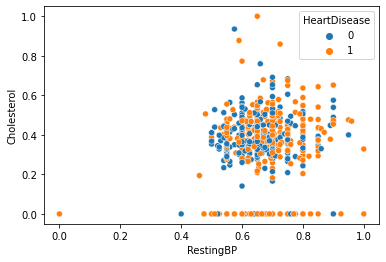

In [19]:
#Normalization
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['RestingBP'], y =X_train_scaled ['Cholesterol'],hue = 'HeartDisease', data = data) #viasualize the particular faetures after

In [20]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [21]:
from sklearn.linear_model import LogisticRegression #import the logistic regression algorithm

In [24]:
logmodel = LogisticRegression()   #define the name of the algorithm

In [25]:
logmodel.fit(X_train,y_train) #training the model

C:\Users\musthaq ahamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)  #test the performance of the algorithm

In [27]:
from sklearn.metrics import classification_report #import the performance evaluavtion m

In [28]:
print(classification_report(y_test,predictions))  #print the performance of the algo

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        73
           1       0.94      0.92      0.93       111

    accuracy                           0.92       184
   macro avg       0.91      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [29]:
from sklearn.metrics import confusion_matrix #import the confusion matrix

In [30]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

Text(123.0, 0.5, 'True Class')

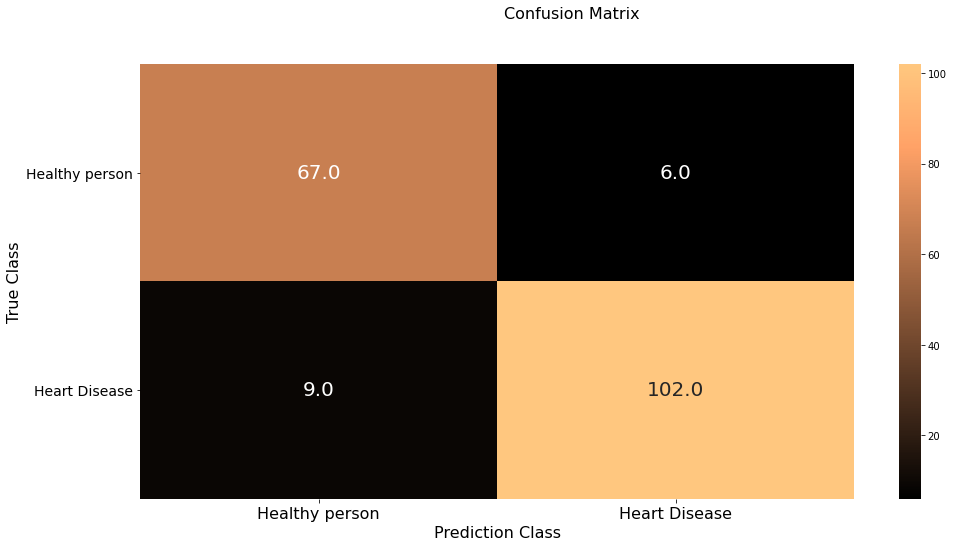

In [32]:
fig=plt.figure(figsize=(16,8))
xticklabel=['Healthy person','Heart Disease']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 20})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=16)
plt.xlabel("Prediction Class",fontsize=16)
plt.ylabel("True Class",fontsize=16)

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,logmodel.predict(X_test))
fpr,tpr,thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

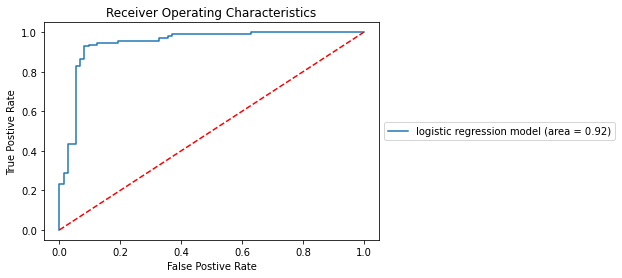

In [42]:
plt.figure()
plt.plot(fpr,tpr,label='logistic regression model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
import tensorflow as tf
tf.__version__

'2.5.0'